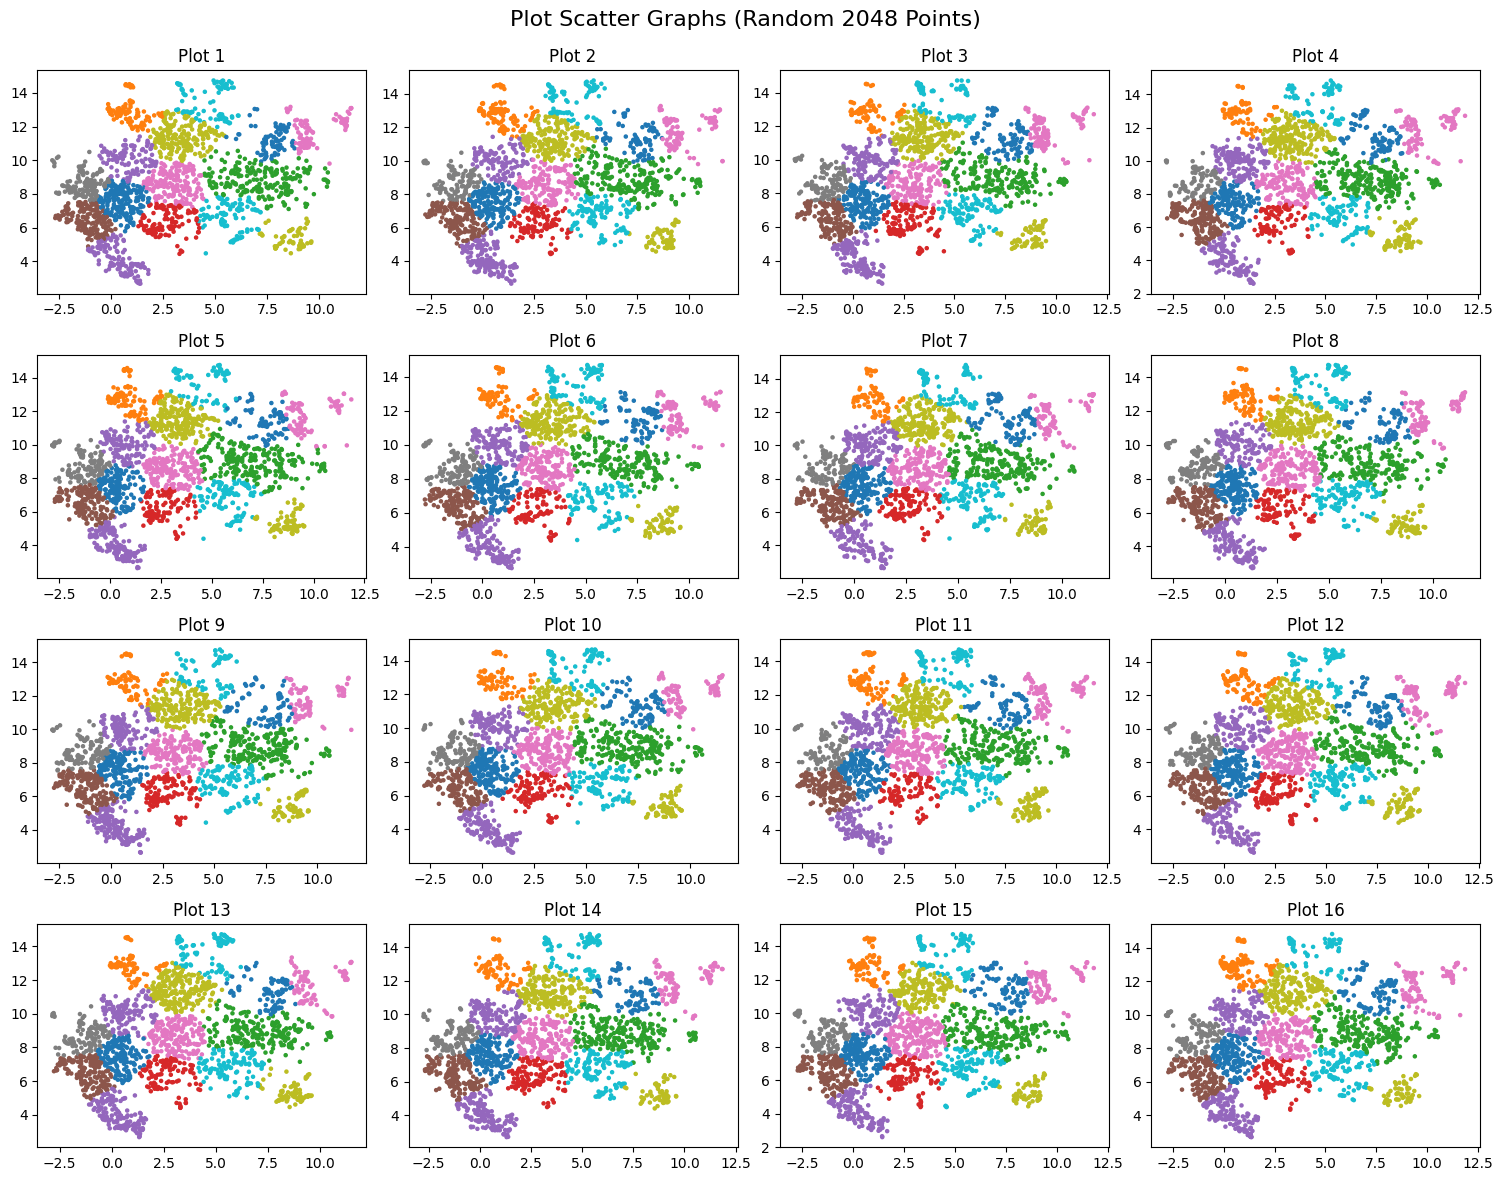

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt


os.chdir("/home/hadoop/KMeans-Hadoop")


# 遍历寻找距离最近的中心点
def closest_center(p, centers):
    minI, minDst = 0, float("inf")
    for cI, c in enumerate(centers):
        dist = np.linalg.norm(p - c)
        if dist < minDst:
            minI = cI
            minDst = dist
    return minI


centers = []  # 解析中心点文件
with open("centers.txt", "r") as f:
    for line in f:
        center = line.strip().split("\t")[1]
        centers.append(np.array([float(x) for x in center.split(",")]))

point_nums = 2048
data = np.load("data.npy")
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
fig.suptitle(f"Plot Scatter Graphs (Random {point_nums} Points)", fontsize=16)

colors = plt.cm.tab10

for i in range(4):
    for j in range(4):
        indices = np.random.choice(data.shape[0], point_nums, replace=False)
        cI = np.array([closest_center(p, centers) for p in data[indices]])
        axs[i, j].scatter(data[indices, 0], data[indices, 1], c=cI, s=5, cmap=colors)
        axs[i, j].set_title(f"Plot {i * 4 + j + 1}")

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()